# 4. Training Classifier

In [20]:
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
#Try different classifier model
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [21]:

# Dataframe
path_df = "Data/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "Data/features_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "Data/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "Data/features_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "Data/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

In [22]:
print(features_train.shape)
print(features_test.shape)

(1891, 300)
(334, 300)


In [23]:
models = {1:'Logistic Regression',
          2:'Multinomial Naive Bayes', 
          3:'K Nearest Neighbour', 
          4:'Support Vector Machines', 
          5:'Random Forest'}

## Cross-Validation for Hyperparameter Tuning

In [29]:
# Pilihan jenis classifier. Untuk selain nomor 1, maka perlu penyesuaian di bagian Random Search dan Grid Search.

choice = 3

if choice == 1:
    classifier = LogisticRegression(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==2:
    classifier = MultinomialNB()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    print(classifier)
elif choice==3:
    classifier =KNeighborsClassifier()
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==4:
    classifier =svm.SVC(random_state=8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())
elif choice==5:
    classifier = RandomForestClassifier(random_state = 8)
    print('Parameters currently in use in {}:\n'.format(models[choice]))
    pprint(classifier.get_params())

Parameters currently in use in K Nearest Neighbour:

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}


### Randomized Search Cross Validation

Cari parameter yang secara random menggunakan cross validation.

In [39]:
if choice == 1:
    # Create the random grid logistic regression
    random_grid = {'C': [float(x) for x in np.linspace(start = 0.1, stop = 1.9, num = 10)],
               'multi_class': ['multinomial'],
               'solver': ['newton-cg', 'sag', 'saga', 'lbfgs'],
               'class_weight': ['balanced', None],
               'penalty': ['l2']}
elif choice==2:
    pass
elif choice==3:
    # Create the random grid KNN
    random_grid = {'algorithm': ['auto'],
                 'leaf_size': [30],
                 'metric': ['minkowski'],
                 'metric_params': [ None ],
                 'n_jobs': [1],
                 'n_neighbors': [5],
                 'p': [2],
                 'weights': ['uniform']}
elif choice==4:
    # Create the random grid SVM
    random_grid = {'C': [.0001, .001, .01],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': [.0001, .001, .01, .1, 1, 10, 100],
                  'degree': [1, 2, 3, 4, 5],
                  'probability': [True]
                 }
elif choice==5:
    # Create the random grid Random Forest
    random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [20, 40, 60, 80, 100, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]
                     }
    
pprint(random_grid)

{'algorithm': ['auto'],
 'leaf_size': [30],
 'metric': ['minkowski'],
 'metric_params': [None],
 'n_jobs': [1],
 'n_neighbors': [5],
 'p': [2],
 'weights': ['uniform']}


In [40]:
# Definition of the random search
random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=50, n_jobs=None,
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [30],
                                        'metric': ['minkowski'],
                                        'metric_params': [None], 'n_jobs': [1],
                                        'n_neighbors': [5], 'p': [2],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=8, 

In [41]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'weights': 'uniform', 'p': 2, 'n_neighbors': 5, 'n_jobs': 1, 'metric_params': None, 'metric': 'minkowski', 'leaf_size': 30, 'algorithm': 'auto'}

The mean accuracy of a model with these hyperparameters is:
0.9360126916975146


### Grid Search Cross Validation

Kemudian lanjutkan pencarian yang lebih detil terhadap daerah nilai terbaik hasil random search di atas.

In [53]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 500, num = 100)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.7min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46,
                                         51, 56, 61, 66, 71, 76, 81, 86, 91, 96,
                                         101, 106, 111, 116, 121, 127, 132, 137,
                                         142, 147, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [62]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 6}

The mean accuracy of a model with these hyperparameters is:
0.9477333333333333


In [63]:
n_neighbors = [1,2,3,4,5,6,7,8,9,10,11]
param_grid = {'n_neighbors': n_neighbors}

knnc = KNeighborsClassifier()
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   21.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [64]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 6}

The mean accuracy of a model with these hyperparameters is:
0.9477333333333333


In [65]:
best_knnc = grid_search.best_estimator_

In [66]:
best_knnc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [58]:

# # Create the parameter grid based on the results of random search 
# param_grid = {'C': [float(x) for x in np.linspace(start = 0.6, stop = 1.5, num = 10)],
#                'multi_class': ['multinomial'],
#                'solver': ['sag'],
#                'class_weight': ['balanced']}

# # Create a base model
# classifier = LogisticRegression(random_state=8)

In [59]:
# # Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
# cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# # Instantiate the grid search model
# grid_search = GridSearchCV(estimator=classifier, 
#                            param_grid=param_grid,
#                            scoring='accuracy',
#                            cv=cv_sets,
#                            verbose=1)

# # Fit the grid search to the data
# grid_search.fit(features_train, labels_train)

In [60]:
# print("The best hyperparameters from Grid Search are:")
# print(grid_search.best_params_)
# print("")
# print("The mean accuracy of a model with these hyperparameters is:")
# print(grid_search.best_score_)

In [61]:
# best_classifier = grid_search.best_estimator_

# best_classifier

### Model fit and performance

In [67]:
best_knnc.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [69]:
knnc_pred = best_knnc.predict(features_test)

In [72]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_knnc.predict(features_train)))

The training accuracy is: 
0.9598096245372819


In [73]:
# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, knnc_pred))

The test accuracy is: 
0.9281437125748503


In [74]:
# Classification report
print("Classification report")
print(classification_report(labels_test,knnc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        81
           1       0.93      0.88      0.91        49
           2       0.97      0.92      0.94        72
           3       0.97      0.96      0.97        72
           4       0.86      0.92      0.89        60

    accuracy                           0.93       334
   macro avg       0.93      0.92      0.93       334
weighted avg       0.93      0.93      0.93       334



In [68]:
# best_classifier.fit(features_train, labels_train)

In [47]:
# classifier_pred = best_classifier.predict(features_test)

In [70]:
# d = {
#      'Model': 'Logistic Regression',
#      'Training Set Accuracy': accuracy_score(labels_train, best_classifier.predict(features_train)),
#      'Test Set Accuracy': accuracy_score(labels_test, classifier_pred)
# }

# df_models = pd.DataFrame(d, index=[0])
# df_models

In [71]:
# # Classification report
# print("Classification report")
# print(classification_report(labels_test,classifier_pred))

### Confusion Matrix

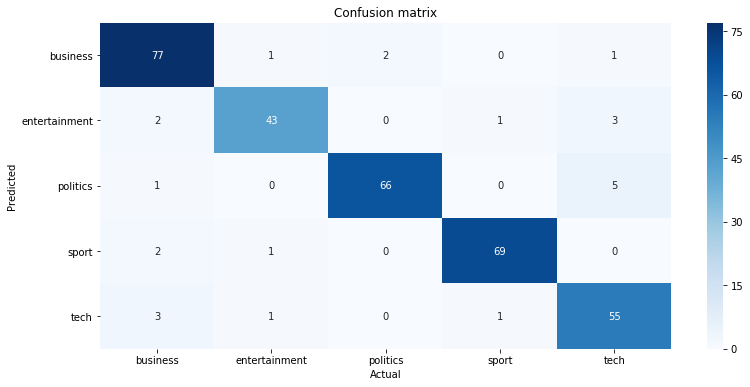

In [75]:
aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
conf_matrix = confusion_matrix(labels_test, knnc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=aux_df['Category'].values, 
            yticklabels=aux_df['Category'].values,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [77]:
base_model = KNeighborsClassifier()
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

0.9341317365269461

In [78]:
best_knnc.fit(features_train, labels_train)
accuracy_score(labels_test, best_knnc.predict(features_test))

0.9281437125748503

In [79]:
d = {
     'Model': 'KNN',
     'Training Set Accuracy': accuracy_score(labels_train, best_knnc.predict(features_train)),
     'Test Set Accuracy': accuracy_score(labels_test, knnc_pred)
}

df_models_knnc = pd.DataFrame(d, index=[0])

In [80]:
df_models_knnc

,Model,Training Set Accuracy,Test Set Accuracy
0,KNN,0.95981,0.928144


In [76]:
# aux_df = df[['Category', 'Category_Code']].drop_duplicates().sort_values('Category_Code')
# conf_matrix = confusion_matrix(labels_test, classifier_pred)
# plt.figure(figsize=(12.8,6))
# sns.heatmap(conf_matrix, 
#             annot=True,
#             xticklabels=aux_df['Category'].values, 
#             yticklabels=aux_df['Category'].values,
#             cmap="Blues")
# plt.ylabel('Predicted')
# plt.xlabel('Actual')
# plt.title('Confusion matrix')
# plt.show()

Bandingkan performansi dengan base model, yaitu model dengan parameter default.

In [51]:
base_model = LogisticRegression(random_state = 8)
base_model.fit(features_train, labels_train)
accuracy_score(labels_test, base_model.predict(features_test))

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9431137724550899

In [52]:
best_classifier.fit(features_train, labels_train)
accuracy_score(labels_test, best_classifier.predict(features_test))

0.9401197604790419

# Latihan

1. Coba buatkan feature berikut, lalu laporkan pengaruhnya terhadap akurasi klasifikasi:
    a. Tanpa proses normalisation
    b. Tanpa proses lemmatisation
    c. Tanpa menghilangkan stopwords
2. Coba buat tfidf dengan nilai "max_features" yang berbeda-beda (lebih besar dan lebih kecil dari 300), lalu laporkan pengaruhnya terhadap akurasi klasifikasi.
3. Jika anda ingin menggunakan teks bahasa Indonesia, bagian mana saja yang perlu dilakukan penyesuaian?
4. Opsional: Gunakan word embedding (e.g word2vec, GloVe), Gunakan classifier yang berbeda-beda.


# Jawaban

Cukup tuliskan jawaban di sini :

1. Testing accuracy dengan melakukan proses normalisasi,lemmatisation dan menghilangkan stopwords 
Testing accuracy tanpa proses Normalisasi,lemmatisation dan tanpa menghilangkan stopwords dengan classifier Linear Regression : 0.9401197604790419

a. Testing accuracy tanpa proses Normalisasi dengan classifier Linear Regression : 0.9341317365269461

b. Testing accuracy tanpa proses lemmatisation dengan classifier Linear Regression : 0.9461077844311377

c. Testing accuracy tanpa proses tanpa mengilangkan stopwords  dengan classifier Linear Regression : 0.9311377245508982


2. Mengganti max_features nya

a. max_features lebih kecil dari 300, saya menggantinya dengan 150, akurasinya:0.9041916167664671

b. max_features lebih besar dari 300, saya menggantinya dengan 600, akurasinya:0.9670658682634731
kesimpulannya: ketika mengganti max_features ke lebih besar maka akurasinya juga akan semakin meningkat. begitupun sebaliknya ketika mengganti max_featuresnya ke lebih kecil maka akurasinya menjadi kecil juga. 

3. Ketika ingin menggunakan bahasa indonesia yanh diganti ialah dokumen atau data nya dengan data-data berbahasa indonesia, lalu pengaturan stopwords nya juga diganti menjadi indonesia untuk normalisasi penghapusan 's juga tidak perlu.

4. 